# Shapely Show & Tell
### by Victor Contreras

"Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library. GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS. The designs of JTS and GEOS are largely guided by the Open Geospatial Consortium’s Simple Features Access Specification 1 and Shapely adheres mainly to the same set of standard classes and operations. Shapely is thereby deeply rooted in the conventions of the geographic information systems (GIS) world, but aspires to be equally useful to programmers working on non-conventional problems." (Gillies)

#### For today's example on how to use Shapely we will be using a couple of other libraries. 
* Functools-Is a module dor higher-order functions that act on or return other functions
* Random-This module implements pseudo-random number generators for various distributions
* PyLab-Is a convenience module that bulk imports matplotlib.plot and NumPy in a single name space.
Today we will demonstrate how we can use Shapely to analyze and plot the intersection of a trajectory and regions in space.

### Import 
Lets begin by importing all the required libraries above.

In [1]:
from functools import partial
import random

import pylab

from shapely.geometry import LineString, Point
from shapely.ops import unary_union

# Creating Patches
First im going to show you how to use Shapely to create a collection of patches by dissolving circular regions then plotting the end result.

In [4]:
r = partial(random.uniform, -20.0, 20.0)
points = [Point(r(), r()) for i in range(100)]

Now lets use the buffer function to produce 100 polygon spots.

In [6]:
spots = [p.buffer(2.5) for p in points]
#Buffer basically expands the point by 2.5

Next step is to use a unary union to dissolve the polygon spots into a collection of polygon patchesNow lets use a unary union to dissolve the polygon spots into a collection of polygon patches

In [7]:
patches = unary_union(spots)
#unary_union basicallly combines all the overlappping spots into a patch.

We can now begin to plot everything

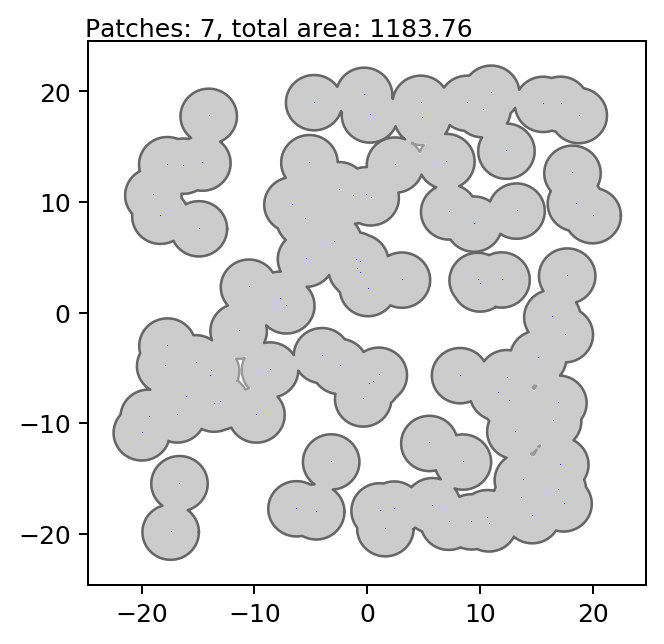

In [8]:
if __name__ == "__main__":
#This basically allows us to run the module as a standalone
    # Plot using pylab 
    pylab.figure(num=None, figsize=(4, 4), dpi=180)
    
    for patch in patches.geoms:
        assert patch.geom_type in ['Polygon']
        assert patch.is_valid
    
        # Fill and outline each patch
        x, y = patch.exterior.xy
        pylab.fill(x, y, color='#cccccc', aa=True) 
        pylab.plot(x, y, color='#666666', aa=True, lw=1.0)
    
        # Do the same for the holes
        for hole in patch.interiors:
            x, y = hole.xy
            pylab.fill(x, y, color='#ffffff', aa=True) 
            pylab.plot(x, y, color='#999999', aa=True, lw=1.0)
    
    # Now we are going to plot the original points
    pylab.plot([p.x for p in points], [p.y for p in points], 'b,', alpha=0.75)
    
    # Add detail to the figure by adding number of patches and the total patch area to the figure
    pylab.text(-25, 25, 
        "Patches: %d, total area: %.2f" % (len(patches.geoms), patches.area))
    


# Anaylyze and Plot intersections of a Trajectory and Region in Space
We now know how to create patches now lets learn how to analyze intersections

Like before lets create patches like the previous example.

In [9]:
r = partial(random.uniform, -20.0, 20.0)
points = [Point(r(), r()) for i in range(100)]
spots = [p.buffer(2.5) for p in points]
patches = unary_union(spots)

Now Lets setup the following geolocation parameters:
* Starting position: -25,-25
* heading: 45.0
* speed: 50*sqrt(2)

To do this use the Shapely LineString class

In [10]:
#LineString creates an order sequennce of two or more point tuples
vector = LineString(((-25.0, -25.0), (25.0, 25.0)))

Next find all the patches that we missed and intercepted that way we can take them into account later.

In [11]:
intercepts = [patch for patch in patches.geoms if vector.intersects(patch)]
misses = (patch for patch in patches.geoms if not vector.intersects(patch))

Begin to plot everything from patches that intercept and patches that are missed.

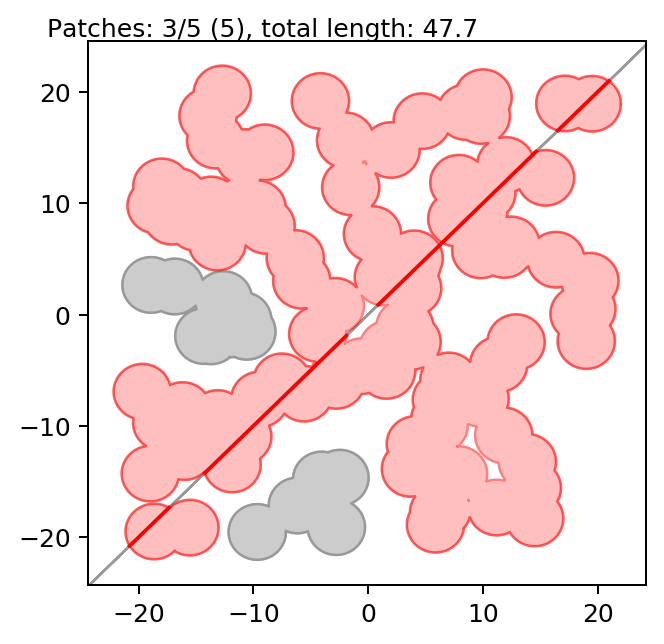

In [12]:
intersection = vector.intersection(patches)
assert intersection.geom_type in ['MultiLineString']

if __name__ == "__main__":
    #Use pylab interface
    pylab.figure(num=None, figsize=(4, 4), dpi=180)
    
    # Plot the misses
    for spot in misses:
        x, y = spot.exterior.xy
        pylab.fill(x, y, color='#cccccc', aa=True) 
        pylab.plot(x, y, color='#999999', aa=True, lw=1.0)
    
        #Plot the holes
        for hole in spot.interiors:
            x, y = hole.xy
            pylab.fill(x, y, color='#ffffff', aa=True) 
            pylab.plot(x, y, color='#999999', aa=True, lw=1.0)
    
    # Plot the intercepts
    for spot in intercepts:
        x, y = spot.exterior.xy
        pylab.fill(x, y, color='red', alpha=0.25, aa=True) 
        pylab.plot(x, y, color='red', alpha=0.5, aa=True, lw=1.0)
    
        # Do the same for the holes of the patch
        for hole in spot.interiors:
            x, y = hole.xy
            pylab.fill(x, y, color='#ffffff', aa=True) 
            pylab.plot(x, y, color='red', alpha=0.5, aa=True, lw=1.0)
    
    # Draw the projected trajectory
    pylab.arrow(-25, -25, 50, 50, color='#999999', aa=True,
        head_width=1.0, head_length=1.0)
    
    for segment in intersection.geoms:
        x, y = segment.xy
        pylab.plot(x, y, color='red', aa=True, lw=1.5)
    
    # Write the number of patches and the total patch area to the figure
    pylab.text(-28, 25, 
        "Patches: %d/%d (%d), total length: %.1f" \
         % (len(intercepts), len(patches.geoms), 
            len(intersection.geoms), intersection.length))

# Summary
In terms of mapping you can use Source Data & Geospatial Data to generate Geospatial Data. However Geospatial data doesnt tell you to what degree two figures overlap or create unions. This is why shapely is so useful since it gives you the power to combine two figures together, find out how much the figures overlap, to what degree they overlap,make new shape out of them etc..